In [1]:
import General_f as Gf
import pandas as pd
pd.set_option("display.precision", 2)
import numpy as np
import importlib
import wx
import DQ_measure_f as DQf
from matplotlib import pyplot as plt
from IPython.display import display
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn' --- Para quitar los warnings de pandas y python

importlib.reload(Gf)
df,_ = Gf.check_df()



<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


No valid DataFrame entered


c:\Users\Fernando Avila\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Columns,Non-NaN Count,Dtype,DtypeDetec
0,Jugadora,866,object,"(String, 100)"
1,Sesion,866,int64,"(Number, 100)"
2,Tipo,866,object,"(String, 100)"
3,Posicion,866,object,"(String, 100)"
4,Diasemana,64,object,"(String, 100)"
...,...,...,...,...
241,[10-25.5]w/kg(ms),866,int64,"(Number, 100)"
242,[25.5-35]w/kg(ms),866,int64,"(Number, 100)"
243,[35-55]w/kg(ms),866,int64,"(Number, 100)"
244,[55-100]w/kg(ms),866,int64,"(Number, 100)"


Total length: 866 rows


In [4]:
df_ideal = df.copy()

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
import General_f as Gf
import importlib
importlib.reload(Gf)
import wx

app = wx.App()
frame = Gf.MyFrame()
frame.CenterOnScreen()
app.SetTopWindow(frame)
app.MainLoop()
app.Destroy()


In [3]:
importlib.reload(Gf)
player = 'Andrea'
muestra = df[df['Jugadora'] == player]

_,dff = Gf.check_df(muestra)

,Columns,Non-NaN Count,Dtype,DtypeDetec
0,Jugadora,68,object,"(String, 100)"
1,Sesion,68,int64,"(Number, 100)"
2,Tipo,68,object,"(String, 100)"
3,Posicion,68,object,"(String, 100)"
4,Diasemana,8,object,"(String, 100)"
...,...,...,...,...
241,"[10-25,5]w/kg(ms)",68,float64,"(Number, 100)"
242,"[25,5-35]w/kg(ms)",68,float64,"(Number, 100)"
243,[35-55]w/kg(ms),68,float64,"(Number, 100)"
244,[55-100]w/kg(ms),68,float64,"(Number, 100)"


Total length: 68 rows


In [3]:
importlib.reload(DQf)
datos = df.copy()
DQ_dim = {}
if frame.dimensions['Consistency'] > 0:
    cons,noCons,muestra = DQf.consistency(datos, clean=False)
    if not pd.isna(cons):
        DQ_dim['Consistency'] = cons

if frame.dimensions['Diversity'] > 0:
    div, _, muestra = DQf.diversity(datos, clean=False)
    if not pd.isna(div):
        DQ_dim['Diversity'] = div
  
if frame.dimensions['Completeness'] > 0:
    compl, muestra = DQf.completeness(datos, clean=False)
    if not pd.isna(compl):
        DQ_dim['Completeness'] = compl

if frame.dimensions['Duplicity'] > 0:
    dup,_,muestra = DQf.duplicity(datos, clean=False)
    if not pd.isna(dup):
        DQ_dim['Duplicity'] = dup

if frame.dimensions['Volume'] > 0:
    vol,muestra = DQf.volume(datos, clean=False)
    if not pd.isna(vol):
        DQ_dim['Volume'] = vol

if frame.dimensions['Precision'] > 0:
    prec,muestra = DQf.precision(datos)
    if not pd.isna(prec):
        DQ_dim['Precision'] = prec

if frame.dimensions['Outliers'] > 0:
    out,muestra = DQf.outliers(datos)
    if not pd.isna(out):
        DQ_dim['Outliers'] = out   

if frame.dimensions['Uncertainty'] > 0:
    unc,muestra = DQf.uncertainty(datos)
    if not pd.isna(unc):
        DQ_dim['Uncertainty'] = unc

DQ_Index = 0
for d in DQ_dim.keys():
    DQ_Index += round((frame.dimensions[d]/sum(frame.dimensions.values())*DQ_dim[d]),2)
print(DQ_dim)
print('DQ_index:',round(DQ_Index,2))

d:\OneDrive - Universidad de Antioquia\PhD\Pasantia\W en Deusto\DataQualityIndex\Deportes\DQ_measure_f.py:253: RuntimeWarning: invalid value encountered in scalar divide
  res = (data[c] > threshold).sum()/data[c].count()
d:\OneDrive - Universidad de Antioquia\PhD\Pasantia\W en Deusto\DataQualityIndex\Deportes\DQ_measure_f.py:257: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, pd.DataFrame({'Column': c,


{'Consistency': 1.0, 'Diversity': 0.31, 'Completeness': 0.97, 'Duplicity': 0.84, 'Volume': 0.0, 'Precision': 0.22, 'Outliers': 0.95, 'Uncertainty': 0.51}
DQ_index: 0.59


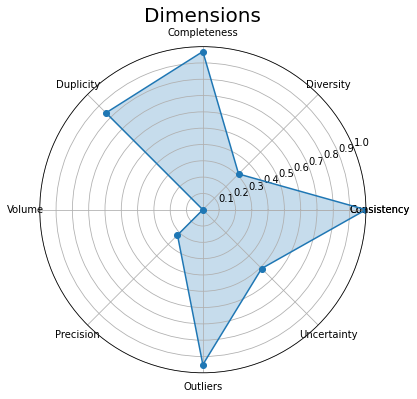

In [4]:

dims = list(DQ_dim.keys())
dims = [*dims, dims[0]]

scores = list(DQ_dim.values())
scores = [*scores, scores[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(dims))

plt.figure(figsize=(6,6))
plt.subplot(polar=True)
plt.plot(label_loc, scores, 'o-')
plt.title('Dimensions', size=20)
plt.thetagrids(np.degrees(label_loc), labels=dims)
plt.fill(label_loc, scores, alpha=0.25)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.ylim(0,1)
#plt.savefig('ideal_lvl1.svg', format='svg')
plt.show()

In [ ]:
ref = pd.Series([1,22,3,4,5,6])
res = muestra['Sesion']
res.reset_index(inplace=True, drop=True)

pd.concat([res, ref], axis=1)
#muestra.reset_index(drop=True)



In [ ]:
print((df['Sesion'].nunique(dropna=True)/len(df['Sesion'])))


((np.log(df['Sesion'].value_counts()/len(df['Sesion']))*(df['Sesion'].value_counts()/len(df['Sesion']))).sum()*-1)/df['Sesion'].nunique(dropna=True)

df['Sesion'].values()


In [5]:
### COMPARACIÓN CÁLCULO DE DIVERSIDAD
# https://ecopy.readthedocs.io/en/latest/diversity.html

especies = {'A':1,
            'B':200}

#########################################
# No hay ponderación o pesos/importancia de cada especie
mio = (len(especies)/sum(especies.values()))

######################################
# Hay peso para cada especie de acuerdo con el número de veces que se repite
shannon = 0
for d in especies:
    shannon += (especies[d]/sum(especies.values()))*np.log(especies[d]/sum(especies.values()))

shannon = 1 - (abs(shannon)/np.log(len(especies)))

######################################
# Hay peso para cada especie de acuerdo con el número de veces que se repite
gini = 0
for d in especies:
    gini += (especies[d]/sum(especies.values()))**2

gini = 1 - gini

######################################
# Hay peso para cada especie de acuerdo con el número de veces que se repite
simpson = 0
for d in especies:
    simpson += (especies[d]/sum(especies.values()))**2

print('Propuesta:',round(mio,2),'\nShannon:',round(shannon,2),'\nGini-Simpson:',round(gini,2),'\nSimpson:',round(simpson,2),'\n*********************\nTOTAL ESPECIES:',len(especies),'\nTOTAL DATOS:',sum(especies.values()))

Propuesta: 0.01 
Shannon: 0.95 
Gini-Simpson: 0.01 
Simpson: 0.99 
*********************
TOTAL ESPECIES: 2 
TOTAL DATOS: 201


In [6]:
importlib.reload(DQf)

if frame.dimensions['legibility'] > 0:
    cons,noCons,muestra = DQf.consistency(muestra, clean=True)
    print('Si')


NameError: name 'frame' is not defined

In [ ]:
importlib.reload(DQf)

if frame.dimensions['variability'] > 0:
    var, deleted, muestra = DQf.variability(muestra, clean=True)
    print('Si')


In [ ]:
importlib.reload(DQf)

if frame.dimensions['completeness'] > 0:
    compl, muestra = DQf.completeness(muestra, clean=True)
    print('Si')


In [ ]:
importlib.reload(DQf)

if frame.dimensions['redundancy'] > 0:
    red,_,muestra = DQf.redundancy(muestra, clean=True)
    print('Si')


In [ ]:
frame.dimensions

In [ ]:
frame.dimensions.values()
DQ_Index = 0
for d, v in zip(frame.dimensions.keys(), [cons, var, compl, red]):
    DQ_Index += round((frame.dimensions[d]/sum(frame.dimensions.values())*v),2)
    print(round((frame.dimensions[d]/sum(frame.dimensions.values())*v),2), '-', round((frame.dimensions[d]/sum(frame.dimensions.values())),2), '-', v)
print('DQ_index:',round(DQ_Index,2))

In [ ]:
importlib.reload(DQf)
DQf.volume(muestra, clean=False)

In [ ]:
importlib.reload(DQf)
DQf.precision(muestra)

In [ ]:
res = pd.DataFrame(1 - (muestra.std(numeric_only=True)/muestra.mean(numeric_only=True)), columns=['prec'])
res['cero'] = 0
res['prec'] = res[['cero','prec']].max(axis=1, skipna=False)
#res['res'] = max('cero','prec')
res['prec'].mean()
#res

In [ ]:
res = (muestra.isnull().sum(axis=0)/len(muestra))
list(res[res>0.5].index)


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Distancia = ['Selection','Starthour', 'FinalHour', 'Distance(m)','ExplosiveDist(m)','HIBD(m)','[0-45]%(m)','[45-65]%(m)',
'[65-75]%(m)','[75-85]%(m)','[85-95]%(m)','[95-100]%(m)','[0-6]km/h(m)','[6-9]km/h(m)','[9-12]km/h(m)','[12-15]km/h(m)',
'[15-18]km/h(m)','[18-21]km/h(m)','[21-50]km/h(m)','[0-45]%Cnt','[45-65]%Cnt','[65-75]%Cnt','[75-85]%Cnt','[85-95]%Cnt',
'[95-100]%Cnt','[0-6]km/hCnt','[6-9]km/hCnt','[9-12]km/hCnt','[12-15]km/hCnt','[15-18]km/hCnt','[18-21]km/hCnt',
'[21-50]km/hCnt','[0-45]%(ms)','[45-65]%(ms)','[65-75]%(ms)','[75-85]%(ms)','[85-95]%(ms)','[95-100]%(ms)','[0-6]km/h(ms)',
'[6-9]km/h(ms)','[9-12]km/h(ms)','[12-15]km/h(ms)','[15-18]km/h(ms)','[18-21]km/h(ms)','[21-50]km/h(ms)']

Aceleracion =['Selection','Starthour', 'FinalHour','Accelerations','Decelerations','MAXAcc(m/s²)','MAXDec(m/s²)',
'AVGAcc(m/s²)','AVGDec(m/s²)','Dif.ACC/DEC','HighAccCnt','HighDecCnt','HighAcc(m)','HighDec(m)','HighAcc(ms)',
'HighDec(ms)','[01]m/s²(m)','[12]m/s²(m)','[23]m/s²(m)','[34]m/s²(m)','[45]m/s²(m)','[56]m/s²(m)','[610]m/s²(m)',
'[-10]m/s²(m)','[-2-1]m/s²(m)','[-3-2]m/s²(m)','[-4-3]m/s²(m)','[-5-4]m/s²(m)','[-6-5]m/s²(m)','[-10-6]m/s²(m)',
'[050]%(m)','[5060]%(m)','[6070]%(m)','[7080]%(m)','[8090]%(m)','[90100]%(m)','[-500]%(m)','[-60-50]%(m)','[-70-60]%(m)',
'[-80-70]%(m)','[-90-80]%(m)','[-100-90]%(m)','[01]m/s²Cnt','[12]m/s²Cnt','[23]m/s²Cnt','[34]m/s²Cnt','[45]m/s²Cnt',
'[56]m/s²Cnt','[610]m/s²Cnt','[-10]m/s²Cnt','[-2-1]m/s²Cnt','[-3-2]m/s²Cnt','[-4-3]m/s²Cnt','[-5-4]m/s²Cnt','[-6-5]m/s²Cnt',
'[-10-6]m/s²Cnt','[050]%Cnt','[5060]%Cnt','[6070]%Cnt','[7080]%Cnt','[8090]%Cnt','[90100]%Cnt','[-500]%Cnt','[-60-50]%Cnt',
'[-70-60]%Cnt','[-80-70]%Cnt','[-90-80]%Cnt','[-100-90]%Cnt','[01]m/s²(ms)','[12]m/s²(ms)','[23]m/s²(ms)','[34]m/s²(ms)',
'[45]m/s²(ms)','[56]m/s²(ms)','[610]m/s²(ms)','[-10]m/s²(ms)','[-2-1]m/s²(ms)','[-3-2]m/s²(ms)','[-4-3]m/s²(ms)',
'[-5-4]m/s²(ms)','[-6-5]m/s²(ms)','[-10-6]m/s²(ms)','[050]%(ms)','[5060]%(ms)','[6070]%(ms)','[7080]%(ms)','[8090]%(ms)',
'[90100]%(ms)','[-500]%(ms)','[-60-50]%(ms)','[-70-60]%(ms)','[-80-70]%(ms)','[-90-80]%(ms)','[-100-90]%(ms)']

Salud = ['Selection','Starthour', 'FinalHour','HRDuration','MAXHR(bpm)','AVGHR(bpm)','Avg(%ofMax)','HighHR(m)',
'HighHRCnt','HighHR(ms)','[50-60]%(m)','[60-70]%(m)','[70-80]%(m)','[80-90]%(m)','[90-100]%(m)','[100-200]%(m)',
'[50-60]%Cnt','[60-70]%Cnt','[70-80]%Cnt','[80-90]%Cnt','[90-100]%Cnt','[100-200]%Cnt','[50-60]%(ms)','[60-70]%(ms)',
'[70-80]%(ms)','[80-90]%(ms)','[90-100]%(ms)','[100-200]%(ms)']

Velocidad = ['Selection','Starthour', 'FinalHour','SprintAbsCnt','SprintRelCnt','HSRAbsCnt','HSRRelCnt','SprintAbs(m)',
'SprintRel(m)','HSRAbs(m)','HSRRel(m)','MAXSpeed(km/h)','AVGSpeed(km/h)','SprintmaxCnt','Sprintmax(m)','Sprintmax(ms)',
'HSRAbsRep','HSRRelRep','SprintAbsRep','SprintRelRep','SprintmaxRep']

Eventos = ['Selection','Starthour', 'FinalHour','Horiz.ImpactsCnt','Stepscount','StepBalance(%)','Jumpscount','JumpsAVGTakeoff(g)',
'JumpsAVGLanding(g)','HighTakeoffCnt','HighLandingCnt','Landing[0-3]GCnt','Landing[3-5]GCnt','Landing[5-8]GCnt','Landing[8-100]GCnt',
'Takeoff[0-3]GCnt','Takeoff[3-5]GCnt','Takeoff[5-8]GCnt','Takeoff[8-100]GCnt']

Frecuencia = ['Selection','Starthour', 'FinalHour','FrecMAX(hz)','FrecAVG(hz)','Hz*GMAX','Hz*GAVG','[0-0,5](ms)',
'[0,5-1](ms)','[1-1,5](ms)','[1,5-100](ms)']

PlayerLoad = ['Selection','Starthour', 'FinalHour','PlayerLoad','PlayerLoadhorizontal','PlayerLoadvertical',
'PlayerLoadantero-posterior','PlayerLoadmedio-lateral',]

Energia = ['Selection','Starthour', 'FinalHour','Powermet','PowermetAvg','Edimax','HMLD','HMLDcnt','EnergyExpenditure',
'DSL','[10-25,5]w/kg(m)','[25,5-35]w/kg(m)','[35-55]w/kg(m)','[55-100]w/kg(m)','[10-25,5]w/kgCnt','[25,5-35]w/kgCnt',
'[35-55]w/kgCnt','[55-100]w/kgCnt','[10-25,5]w/kg(ms)','[25,5-35]w/kg(ms)','[35-55]w/kg(ms)','[55-100]w/kg(ms)',
'Signal',]

agrupamiento = ['Date', 'Sesion', 'Selection']
muestra.set_index(agrupamiento, inplace=True)


#seccion.groupby(agrupamiento, group_keys=True)[Distancia].apply(lambda x:x)


In [ ]:
importlib.reload(DQf)
_,muestra = DQf.outliers(muestra, clean=True)

#seccion[Distancia].plot()
#seccion[Distancia].corr()



In [ ]:
filter = ['DrillsDuration(t)','Distance(m)','ExplosiveDist(m)','HIBD(m)','Accelerations(#)','MAXAcc(m/s²)','MAXDec(m/s²)','HighAcc(m)','HighDec(m)',
          'MAXHR(bpm)','HighHR(ms)','HighHRCnt(#)','MAXSpeed(km/h)','AVGSpeed(km/h)','SprintmaxCnt(#)','Sprintmax(m)','Sprintmax(ms)',
          'Stepscount(#)','Jumpscount(#)']

filter = list(set(filter) - (set(filter) - set(muestra.columns)))


seccion = muestra[filter]
seccion['DrillsDuration(t)'] = pd.to_timedelta(seccion['DrillsDuration(t)'].astype(str)).dt.total_seconds()
seccion.rename({'DrillsDuration(t)':'DrillsDuration(s)'}, axis=1, inplace=True)
_,_,seccion = DQf.redundancy(seccion, clean=True)

In [ ]:
# Show high correlated variables as a List
threshold_corr = 0.8
corr_matrix = seccion.corr(numeric_only=True).abs()
high_corr_var = np.where(corr_matrix > threshold_corr)
corr_matrix = seccion.corr(numeric_only=True)
high_corr_matrix = pd.DataFrame(columns=['Var2','Corr'])
for x,y in zip(*high_corr_var):
    if x != y and x < y:
        high_corr_matrix = pd.concat([high_corr_matrix, pd.DataFrame({
                                                                'Var2':corr_matrix.columns[y],
                                                                'Corr':corr_matrix.iat[x,y]}, 
                                                                index=[corr_matrix.columns[x]])], axis = 0, ignore_index = False)

#high_corr_matrix

In [ ]:
# Show high correlated variables as a Matrix
alta_corr = pd.DataFrame(np.NaN, columns=high_corr_matrix.Var2.unique(), index=high_corr_matrix.index.unique())
for x in range(len(high_corr_matrix)):
    row = high_corr_matrix.iloc[[x]].index.values[0]
    col = high_corr_matrix.iloc[[x]].Var2.values[0]
    alta_corr.at[row,col] = high_corr_matrix.iloc[[x]].Corr.values[0]
#alta_corr


In [ ]:
# Best performance
best = seccion.loc[seccion[['Distance(m)']].idxmax()]

# Preliminar individual results for each player
print('Player:',player)
print('')
print('****** Best Performance ******')
print('Sesion:',best.index[0][1])
print('Date:',best.index[0][0].date())
for c in seccion.columns:
    print(str(c)+':',best[c].max())

print('')
print('****** Trends ******')
res = False
for x,y in zip(high_corr_matrix.index, high_corr_matrix.Var2):
    print(str(x),'and',str(y)+':','True')

In [ ]:
data1

In [ ]:
# Create some mock data
variable1 = 'Accelerations(#)'
variable2 = 'MAXHR(bpm)'
index = 'Sesion'
data1 = seccion.loc[:, :, 'Partido completo'][variable1]
data2 = seccion.loc[:, :, 'Partido completo'][variable2]

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel(index)
ax1.set_ylabel(variable1.split('(')[1][:-1], color=color)
ax1.plot(np.sort(data1.index.get_level_values(index)), data1.interpolate(method='linear'), color=color, label=variable1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=0)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(variable2.split('(')[1][:-1], color=color)  # we already handled the x-label with ax1
ax2.plot(np.sort(data1.index.get_level_values(index)), data2.interpolate(method='linear'), color=color, label=variable2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelrotation=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend()
plt.show()

In [ ]:
np.sort(data1.index.get_level_values('Sesion'))


In [ ]:
seccion.xs(('Partido completo',42), level=('Selection', 'Sesion'))

### PCA

In [122]:
importlib.reload(DQf)
importlib.reload(Gf)
completos = df[df['Selection'] == 'Partido completo']


In [123]:
datos = completos.copy()

_,datos = DQf.volume(datos, clean=True)
_,noLeg,datos = DQf.consistency(datos, clean=True)
_,_,datos = DQf.diversity(datos, clean=True)

# Show correlated variables as a List
threshold_corr = 0.9
corr_matrix = datos.corr(numeric_only=True).abs()
corr_var = np.where(corr_matrix > threshold_corr)
corr_matrix = datos.corr(numeric_only=True)
corr_var_matrix = pd.DataFrame(columns=['Var2','Corr'])
for x,y in zip(*corr_var):
    if x != y and x < y:
        corr_var_matrix = pd.concat([corr_var_matrix, pd.DataFrame({
                                                                'Var2':corr_matrix.columns[y],
                                                                'Corr':corr_matrix.iat[x,y]}, 
                                                                index=[corr_matrix.columns[x]])], axis = 0, ignore_index = False)


d:\OneDrive - Universidad de Antioquia\PhD\Pasantia\W en Deusto\DataQualityIndex\Deportes\DQ_measure_f.py:85: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
var_corr = pd.DataFrame(np.NaN, columns=corr_var_matrix.Var2.unique(), index=corr_var_matrix.index.unique())
for x in range(len(corr_var_matrix)):
    row = corr_var_matrix.iloc[[x]].index.values[0]
    col = corr_var_matrix.iloc[[x]].Var2.values[0]
    var_corr.at[row,col] = corr_var_matrix.iloc[[x]].Corr.values[0]


In [ ]:
ref = 'Distance(m)'
filtro = list(corr_var_matrix[corr_var_matrix.index == ref]['Var2'])
filtro = [ x for x in filtro if "]%" not in x ]
#filtro = [filtro[0], ref]
filtro.append(ref)


In [ ]:
len(list(corr_var_matrix[['Var2']].itertuples(index=True, name=None)))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations

cont = 0
#for comb in list(corr_var_matrix[['Var2']].itertuples(index=True, name=None)):
for comb in combinations(['Takeoff[8-100]GCnt', 'Hz*GAVG', 'FrecAVG(hz)','SprintRelRep'],2):
    comb = list(comb)

    x = datos.loc[:, comb].values
    x = StandardScaler().fit_transform(x) # normalizing the features

    if len(comb) <= 2:
        componentes = 2
    else:
        componentes = 'mle'

    normalized_datos = pd.DataFrame(x,columns=comb)

    pca_datos = PCA(n_components=componentes)
    principalComponents_datos = pca_datos.fit_transform(x)

    PCA_cols = [ 'PCA'+str(x+1) for x in range(principalComponents_datos.shape[1])]

    principal_datos_Df = pd.DataFrame(data = principalComponents_datos
                , columns = PCA_cols)

    pca_datos.explained_variance_ratio_.sum(), principalComponents_datos.shape

    if cont > 0 and cont <= 20:
        targets = list(datos['Posicion'].unique())

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
        ax1.set_xlabel(comb[0],fontsize=10)
        ax1.set_ylabel(comb[1],fontsize=10)
        ax1.set_title("Principal Component Analysis of Datos",fontsize=10)

        for target in targets:
            indicesToKeep = datos['Posicion'] == target
            ax1.scatter(principal_datos_Df.loc[indicesToKeep, PCA_cols[0]]
                    , principal_datos_Df.loc[indicesToKeep, PCA_cols[1]], s = 25)

        ax1.legend(targets,prop={'size': 8})

        ax2.set_xlabel(comb[0],fontsize=10)
        ax2.set_ylabel(comb[1],fontsize=10)
        ax2.set_title("Real Values of Datos",fontsize=10)

        for target in targets:
            indicesToKeep = datos['Posicion'] == target
            ax2.scatter(datos.loc[indicesToKeep, comb[0]]
                    , datos.loc[indicesToKeep, comb[1]], s = 25)

        ax2.legend(targets,prop={'size': 8})

        plt.show()


    cont += 1

In [ ]:

plt.figure()
plt.figure(figsize=(10,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Hz*GAVG',fontsize=20)
plt.ylabel('FrecAVG(hz)',fontsize=20)
plt.title("Principal Component Analysis of Datos",fontsize=20)
targets = list(datos['Posicion'].unique())

for target in targets:
    indicesToKeep = datos['Posicion'] == target
    plt.scatter(datos.loc[indicesToKeep, 'Hz*GAVG']
               , datos.loc[indicesToKeep, 'FrecAVG(hz)'], s = 50)

plt.legend(targets,prop={'size': 15})

In [ ]:
datos.head()

interesantes = ['Hz*GAVG', 'FrecAVG(hz)','SprintRelCnt(#)', 'Jumpscount(#)', 'SprintRelRep', 'Takeoff[8-100]GCnt']
#datos.columns[datos.columns.str.contains('8-100')]
datos[interesantes].corr()


In [157]:
importlib.reload(DQf)

new = 'SprintRelCnt(#)'

interesantes = ['Hz*GAVG', 'FrecAVG(hz)','SprintRelCnt(#)', '[0,5-1](ms)', '[1-1,5](ms)', 'Takeoff[3-5]GCnt', 'Takeoff[5-8]GCnt', 'Takeoff[8-100]GCnt', 'StepBalance(%)', 'JumpsAVGTakeoff(g)']
#interesantes.append(new)
# 'Hz*GAVG' --> PORTERA, PIVOT
# 'StepBalance(%)' --> CIERRE
# '[1-1,5](ms)' --> ALA, CIERRE
# 'Takeoff[3-5]GCnt' --> PIVOT
# 'Takeoff[5-8]GCnt' --> ALA, ALA-CIERRE
# 'Takeoff[8-100]GCnt' --> ALA-CIERRE, ALA-PIVOT
# 'JumpsAVGTakeoff(g)' --> ALA-CIERRE, ALA-PIVOT, ALA, PIVOT(Parcial)
# 'SprintRelCnt(#)' --> ALA-PIVOT, ALA
# '[0,5-1](ms)'  --> ALA-CIERRE


res = datos[interesantes]
res['Posicion'] = datos['Posicion']
#_,res = DQf.outliers(res, clean=True)

targets = list(res['Posicion'].unique())
targets.sort()
for p,s in zip(targets, range(6)):
    indicesToKeep = res['Posicion'] == p
    res.loc[indicesToKeep, 'Hz*GAVG'] += s/100

<Figure size 432x288 with 0 Axes>

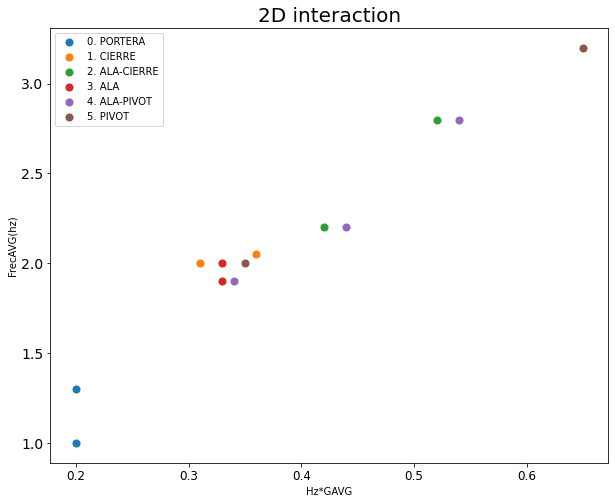

In [164]:
# fig = plt.figure(figsize=(10,8))

# ax = plt.axes(projection='3d')

# ax.set_xlabel('Hz*GAVG',fontsize=10)
# ax.set_ylabel('FrecAVG(hz)',fontsize=10)
# ax.set_zlabel(new,fontsize=10)

targets = list(res['Posicion'].unique())
targets.sort()

# for target in targets:
#     indicesToKeep = res['Posicion'] == target
#     ax.scatter3D(res.loc[indicesToKeep, 'Hz*GAVG'],
#                  res.loc[indicesToKeep, 'FrecAVG(hz)'],
#                  res.loc[indicesToKeep, new], s = 50)

# plt.legend(targets,prop={'size': 10})

# plt.show()

plt.figure()
plt.figure(figsize=(10,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Hz*GAVG',fontsize=10)
plt.ylabel('FrecAVG(hz)',fontsize=10)
plt.title("2D interaction",fontsize=20)

for target in targets:
    indicesToKeep = res['Posicion'] == target
    plt.scatter(res.loc[indicesToKeep, 'Hz*GAVG'],
               res.loc[indicesToKeep, 'FrecAVG(hz)'], s = 50)

plt.legend(targets,prop={'size': 10})
plt.show()


import plotly.express as px
fig = px.scatter_3d(res, x='Hz*GAVG', y='FrecAVG(hz)', z=new,
              color='Posicion', width=1000, height=800, title='3D interaction')
fig.show()



In [163]:
res = datos.groupby(['Jugadora','Posicion'])[['Hz*GAVG', 'FrecAVG(hz)', new]].median()#agg(lambda x: pd.Series.mode(x)[0])
res.reset_index(['Posicion'], inplace=True)
for p,s in zip(targets, range(6)):
    indicesToKeep = res['Posicion'] == p
    res.loc[indicesToKeep, 'Hz*GAVG'] += s/100
res

,Posicion,Hz*GAVG,FrecAVG(hz),SprintRelCnt(#)
Jugadora,,,,
Alba,4. ALA-PIVOT,0.44,2.20,1.0
Almudena,0. PORTERA,0.20,1.30,0.0
Andrea,2. ALA-CIERRE,0.42,2.20,0.0
Angela,5. PIVOT,0.35,2.00,0.0
Consuelo,4. ALA-PIVOT,0.54,2.80,0.0
Cristi,3. ALA,0.33,1.90,1.0
Cristina,0. PORTERA,0.20,1.00,0.0
Lola,4. ALA-PIVOT,0.34,1.90,0.0
Marian,3. ALA,0.33,2.00,0.0
